high → High Intent
The lead is likely to convert (e.g., shows interest, has high income/credit score, or uses urgent language in comments).

low → Low Intent
The lead is less likely to convert (e.g., exploratory behavior, lower income/credit score, or dismissive comments).

In [182]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
fake = Faker()
Faker.seed(42)

def generate_customer_data(n_samples=1000):
    """
    Generate synthetic customer data with realistic correlations
    """
    data = []
    
    # Keep track of generated emails to ensure uniqueness
    generated_emails = set()
    
    # Define age groups and their probabilities
    age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    age_group_weights = [0.15, 0.25, 0.25, 0.20, 0.10, 0.05]
    
    # Family background categories
    family_backgrounds = ['Single', 'Married', 'Married with Children', 'Single Parent', 'Divorced']
    
    # Intent categories (target variable)
    intent_categories = ['Low', 'High']
    
    for i in range(n_samples):
        # Generate unique email
        email = fake.email()
        counter = 1
        while email in generated_emails:
            # If duplicate, generate a new one with a counter
            base_email = email.split('@')[0]
            domain = email.split('@')[1]
            email = f"{base_email}{counter}@{domain}"
            counter += 1
        generated_emails.add(email)
        
        # Generate Indian phone number format (+91 followed by 10 digits)
        # Indian mobile numbers typically start with 6, 7, 8, or 9
        first_digit = np.random.choice([6, 7, 8, 9])
        remaining_digits = ''.join([str(np.random.randint(0, 10)) for _ in range(9)])
        phone_number = f"+91 {first_digit}{remaining_digits}"
        
        # Age group (affects many other variables)
        age_group = np.random.choice(age_groups, p=age_group_weights)
        
        # Generate specific age within the age group
        age_ranges = {
            '18-25': (18, 25),
            '26-35': (26, 35),
            '36-45': (36, 45),
            '46-55': (46, 55),
            '56-65': (56, 65),
            '65+': (66, 85)
        }
        min_age, max_age = age_ranges[age_group]
        age = np.random.randint(min_age, max_age + 1)
        
        # Family background (correlated with age group)
        if age_group in ['18-25']:
            family_background = np.random.choice(['Single', 'Married'], p=[0.8, 0.2])
        elif age_group in ['26-35']:
            family_background = np.random.choice(['Single', 'Married', 'Married with Children'], p=[0.4, 0.3, 0.3])
        elif age_group in ['36-45', '46-55']:
            family_background = np.random.choice(['Married', 'Married with Children', 'Single Parent', 'Divorced'], p=[0.2, 0.5, 0.2, 0.1])
        else:  # 56+ age groups
            family_background = np.random.choice(['Married', 'Divorced', 'Single'], p=[0.6, 0.25, 0.15])
        
        # Income (correlated with age and family background)
        # Base income increases with age (career progression)
        age_income_multiplier = {
            '18-25': 0.6,
            '26-35': 0.8,
            '36-45': 1.2,
            '46-55': 1.4,
            '56-65': 1.3,
            '65+': 1.0
        }[age_group]
        
        # Base income with age consideration
        base_income = np.random.uniform(400000, 1500000) * age_income_multiplier
        
        # Adjust income based on family background
        family_multiplier = {
            'Single': 0.9,
            'Married': 1.3,
            'Married with Children': 1.5,
            'Single Parent': 0.8,
            'Divorced': 0.85
        }[family_background]
        
        income = max(300000, base_income * family_multiplier)  # Minimum 3 lakh per year
        
        # Credit score (correlated with income and age, with controlled outliers)
        # Older people generally have better credit history
        age_boost = (age - 25) * 2  # Modest age influence
        income_boost = (income - 500000) / 15000  # Income influence
        
        # Base credit score with influences
        base_credit = 650 + age_boost + income_boost
        
        # Generate credit score with controlled variance
        credit_score = np.random.normal(base_credit, 50)  # Reduced std dev
        
        # Apply realistic bounds
        credit_score = max(300, min(850, credit_score))
        
        # Controlled outlier generation (2% chance instead of 5%)
        outlier_chance = np.random.random()
        if outlier_chance < 0.02:  # 2% chance of very low credit
            credit_score = np.random.uniform(300, 450)
        elif outlier_chance < 0.04:  # 2% chance of very high credit
            credit_score = np.random.uniform(750, 850)
        
        # Optional: Winsorize extreme values (cap at 5th and 95th percentiles)
        # This further reduces outliers while keeping some variance
        if credit_score < 500:  # Bottom 5% cap
            credit_score = max(credit_score, 450)
        elif credit_score > 800:  # Top 5% cap
            credit_score = min(credit_score, 820)
        
        # Intent (target variable - correlated with income, credit score, and age)
        # Normalize factors
        income_factor = min(1.0, (income - 300000) / 1500000)  # Scale 0-1
        credit_factor = min(1.0, (credit_score - 300) / 550)   # Scale 0-1
        age_factor = min(1.0, (age - 18) / 60)                 # Scale 0-1
        
        # Combined intent probability (weighted combination)
        intent_prob = (income_factor * 0.4 + credit_factor * 0.3 + age_factor * 0.3)
        
        # Add some randomness to prevent perfect correlation
        intent_prob = intent_prob * 0.7 + np.random.random() * 0.3
        
        # Determine intent based on probability
        intent = 'High' if intent_prob > 0.5 else 'Low'
        
        # Generate comments based on intent and other factors
        if intent == 'High':
            high_intent_comments = [
                "Very interested in premium products, please schedule a demo",
                "Looking for high-quality solutions for my business needs",
                "Ready to make a purchase decision within this week",
                "Willing to pay for quality service, budget is not a constraint",
                "Comparing different premium options but leaning towards your product",
                "Had a great experience with your competitor, want to switch",
                "Need urgent solution for my project, can we fast-track this?",
                "Impressed with your product features, let's discuss pricing",
                "My colleague recommended your service, very interested",
                "Looking for long-term partnership, not just one-time purchase",
                "Budget approved by management, ready to proceed",
                "Attended your webinar, convinced about the value proposition",
                "Current solution is not meeting our needs, exploring alternatives",
                "Expansion plans require robust solution like yours",
                "ROI calculations look promising, let's move forward"
            ]
            comments = np.random.choice(high_intent_comments)
        else:  # Low intent
            low_intent_comments = [
                "Just browsing for now, collecting information for future",
                "Price is a major concern, looking for budget-friendly options",
                "Not ready to make a decision, still in research phase",
                "Looking for basic options only, nothing too complex",
                "Will consider in the future when business grows",
                "Currently happy with existing solution, just exploring",
                "Budget constraints prevent immediate purchase",
                "Need to understand if this is really necessary for us",
                "Too many features, looking for something simpler",
                "Timing is not right, maybe next year",
                "Boss asked me to research but no immediate plans",
                "Student/researcher, mainly interested in learning",
                "Small business, concerned about ongoing costs",
                "Not the decision maker, just gathering information",
                "Heard about your company, wanted to check what you offer",
                "Economic uncertainty makes us cautious about new purchases",
                "Current solution works fine, just checking alternatives",
                "Part of market research, not actively buying",
                "Impressed by features but implementation seems complex",
                "Need to focus on core business first before expanding",
                "Considering options carefully, need more technical details",
                "Interested but needs approval from my manager first",
                "Looking for good value deals, can you provide better pricing?",
                "Comparing features and prices with 2-3 other vendors",
                "Might purchase in the next few months if budget allows",
                "Product looks good but need to understand implementation process",
                "Waiting for next quarter budget allocation to decide",
                "Need references from similar companies in our industry",
                "Evaluating multiple solutions, yours is in top 3 contenders",
                "Timeline is flexible, but quality is most important factor"
            ]
            comments = np.random.choice(low_intent_comments)
        
        # Round numerical values
        income = round(income, 2)
        credit_score = round(credit_score)
        
        data.append({
            'email': email,
            'phone_number': phone_number,
            'age': age,
            'age_group': age_group,
            'credit_score': credit_score,
            'family_background': family_background,
            'income': income,
            'intent': intent,
            'comments': comments
        })
    
    return pd.DataFrame(data)

# Generate the dataset
df = generate_customer_data(10000)

# Display basic information about the dataset
print("=== SYNTHETIC CUSTOMER DATASET ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nIntent distribution:")
print(df['intent'].value_counts())

print("\nAge group distribution:")
print(df['age_group'].value_counts())

print("\nFamily background distribution:")
print(df['family_background'].value_counts())

# Show correlations between numerical variables
print("\nCorrelation analysis:")
numerical_cols = ['age', 'credit_score', 'income']
print(df[numerical_cols].corr())

# Show intent vs income correlation
print("\nAverage income by intent level:")
intent_income = df.groupby('intent')['income'].agg(['mean', 'std', 'count'])
print(intent_income)

print("\nAverage credit score by intent level:")
intent_credit = df.groupby('intent')['credit_score'].agg(['mean', 'std', 'count'])
print(intent_credit)

print("\nAverage age by intent level:")
intent_age = df.groupby('intent')['age'].agg(['mean', 'std', 'count'])
print(intent_age)

# Check for duplicates in key fields
print(f"\nDuplicate emails: {df['email'].duplicated().sum()}")
print(f"Duplicate phone numbers: {df['phone_number'].duplicated().sum()}")
print(f"Total unique emails: {df['email'].nunique()}")

# Analysis of outliers
print("\nCredit Score Analysis:")
print(f"Credit scores below 450: {(df['credit_score'] < 450).sum()}")
print(f"Percentage of low credit scores: {(df['credit_score'] < 450).mean() * 100:.1f}%")

# Save to CSV
df.to_csv('processed_leads.csv', index=False)
print("\nDataset saved as 'synthetic_customer_data.csv'")

=== SYNTHETIC CUSTOMER DATASET ===
Dataset shape: (10000, 9)

First 5 rows:
                       email    phone_number  age age_group  credit_score  \
0  johnsonjoshua@example.org  +91 8374692674   43     36-45           450   
1     jillrhodes@example.net  +91 7809263824   40     36-45           702   
2   garzaanthony@example.org  +91 6941367203   29     26-35           605   
3    jesseguzman@example.net  +91 7376874147   34     26-35           450   
4  jennifermiles@example.com  +91 9207220496   52     46-55           725   

       family_background      income intent  \
0  Married with Children   831694.93    Low   
1  Married with Children   746264.62    Low   
2                 Single   699893.87    Low   
3                 Single   418891.42    Low   
4          Single Parent  1001723.23   High   

                                            comments  
0  Product looks good but need to understand impl...  
1  Product looks good but need to understand impl...  
2  Price is a

In [183]:
df = pd.read_csv('processed_leads.csv')

In [184]:
df.head()

,email,phone_number,age,age_group,credit_score,family_background,income,intent,comments
0,johnsonjoshua@example.org,+91 8374692674,43,36-45,450,Married with Children,831694.93,Low,Product looks good but need to understand impl...
1,jillrhodes@example.net,+91 7809263824,40,36-45,702,Married with Children,746264.62,Low,Product looks good but need to understand impl...
2,garzaanthony@example.org,+91 6941367203,29,26-35,605,Single,699893.87,Low,"Price is a major concern, looking for budget-f..."
3,jesseguzman@example.net,+91 7376874147,34,26-35,450,Single,418891.42,Low,Need to understand if this is really necessary...
4,jennifermiles@example.com,+91 9207220496,52,46-55,725,Single Parent,1001723.23,High,"Attended your webinar, convinced about the val..."


In [185]:
df.shape

(10000, 9)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   email              10000 non-null  object 
 1   phone_number       10000 non-null  object 
 2   age                10000 non-null  int64  
 3   age_group          10000 non-null  object 
 4   credit_score       10000 non-null  int64  
 5   family_background  10000 non-null  object 
 6   income             10000 non-null  float64
 7   intent             10000 non-null  object 
 8   comments           10000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [187]:
df.describe()

,age,credit_score,income
count,10000.000000,10000.000000,1.000000e+04
mean,40.968700,719.764100,1.190524e+06
std,14.459883,78.476381,6.392186e+05
min,18.000000,450.000000,3.000000e+05
25%,30.000000,670.000000,6.978184e+05
50%,40.000000,726.000000,1.045527e+06
75%,51.000000,783.000000,1.561712e+06
max,85.000000,820.000000,3.149056e+06


In [188]:
df['family_background'].unique()

array(['Married with Children', 'Single', 'Single Parent', 'Married',
       'Divorced'], dtype=object)

In [189]:
df['email'].duplicated().sum()

0

In [190]:
df['age'].min()
df['age'].max()
df['age'].mean()
df['age'].median()

40.0

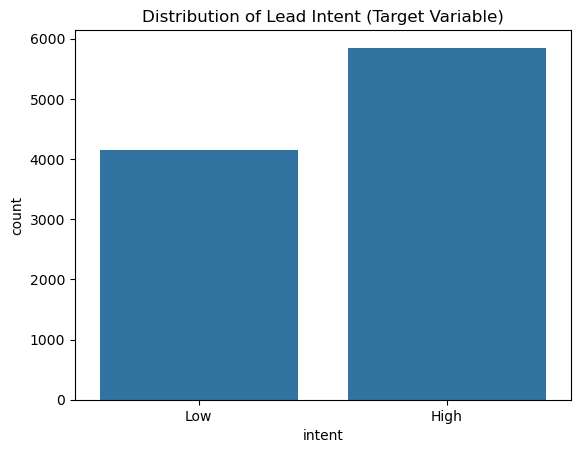

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='intent', data=df)
plt.title('Distribution of Lead Intent (Target Variable)')
plt.show()


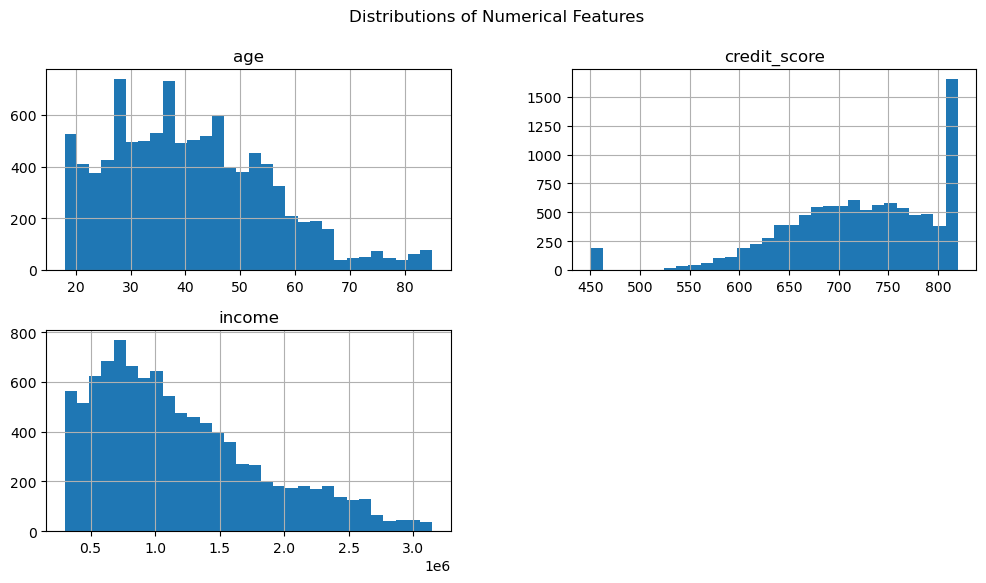

In [192]:
numerical_cols = ['age', 'credit_score', 'income']
df[numerical_cols].hist(bins=30, figsize=(12, 6))
plt.suptitle('Distributions of Numerical Features')
plt.show()


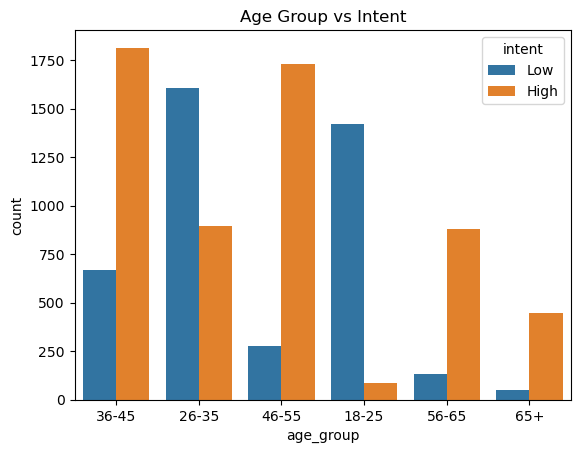

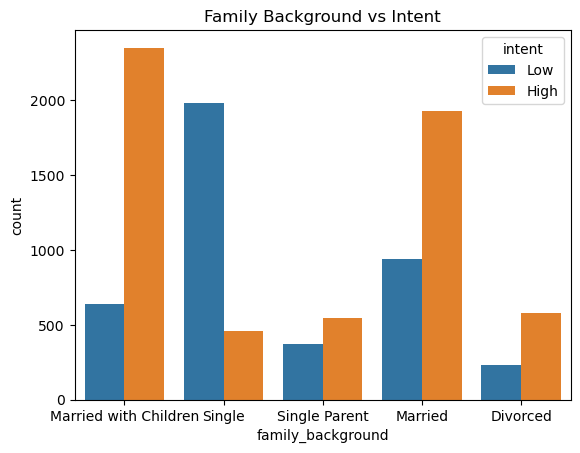

In [193]:
sns.countplot(x='age_group', hue='intent', data=df)
plt.title('Age Group vs Intent')
plt.show()

sns.countplot(x='family_background', hue='intent', data=df)
plt.title('Family Background vs Intent')
plt.show()


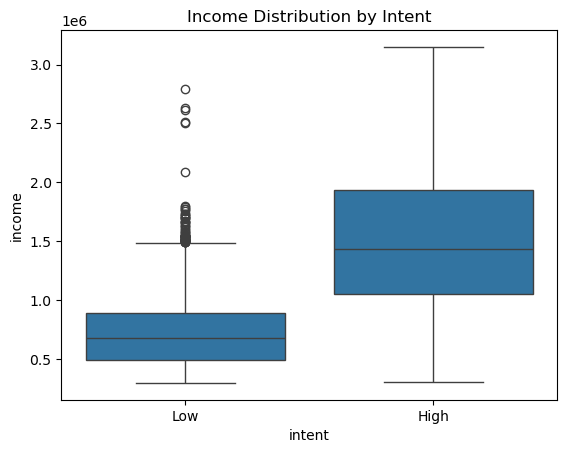

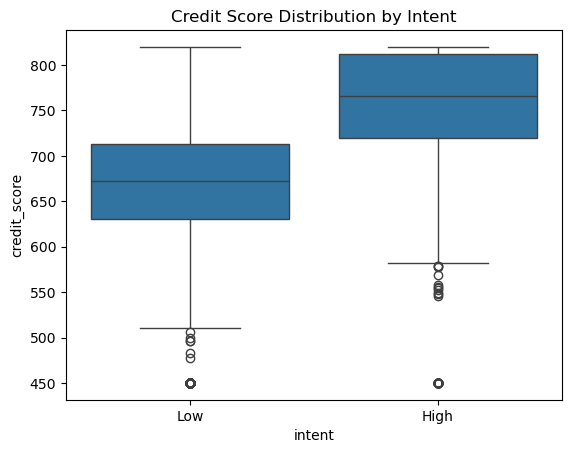

In [194]:
sns.boxplot(x='intent', y='income', data=df)
plt.title('Income Distribution by Intent')
plt.show()

sns.boxplot(x='intent', y='credit_score', data=df)
plt.title('Credit Score Distribution by Intent')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split